In [1]:
#Nathan Li - Visualizing Dog Data
#This was a very helpful resource: https://www.python-graph-gallery.com/

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-dogs-nathan-li/Clean-Dogs-Nathan-Li.csv


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.close("all")

In [4]:
dog_data = pd.read_csv("/kaggle/input/clean-dogs-nathan-li/Clean-Dogs-Nathan-Li.csv")
dog_data.head()

,Dog_Name,Dog_Breed,Latitude_masked,Longitude_masked,Neighborhood
0,Ella,Golden Retriever,42.381385,-71.109633,Agassiz
1,Nalah,Mix,42.374769,-71.096900,Wellington-Harrington
2,Mic,Havanese,42.375608,-71.156026,Strawberry Hill
3,Cash,Labrador Retriever,42.372009,-71.095547,Wellington-Harrington
4,Barley,Labradoodle,42.374266,-71.137563,West Cambridge


Text(0.5, 1.0, 'Bar Graph of Popular Dogs')

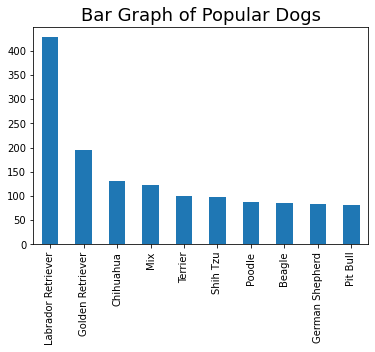

In [5]:
#Since this is my first plot, I decided to just make a simple bar graph that counts the top 10 popular dog breeds in all of Cambridge.
dog_data.Dog_Breed.value_counts()[:10].plot(kind = "bar")
plt.title("Bar Graph of Popular Dogs", size=18)

Text(0.5, 1.0, 'Treemap of Neighborhoods')

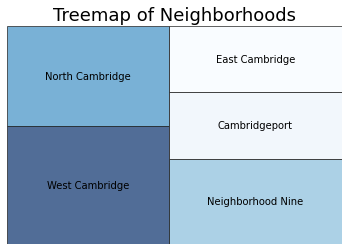

In [6]:
#For my second graph, I wanted to make something a bit fancier, so I made a treemap to see which neighborhoods have the most dogs.
my_values = dog_data.Neighborhood.value_counts()[:5]
cmap = matplotlib.cm.Blues
mini = min(my_values)
maxi = max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
squarify.plot(sizes=my_values, label=my_values.index, alpha=.7, color=colors, bar_kwargs=dict(linewidth=1, edgecolor="#222222")).axis("off")
plt.title("Treemap of Neighborhoods", size=18)

Text(0.5, 1.0, 'Scatter Plot of Dog Locations')

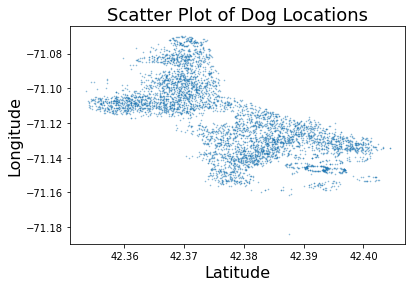

In [7]:
#Next, I wanted to see if I could make out noticible differences in dog population densities with respect to longitude and latitude by using scatterplots.
plt.scatter('Latitude_masked', 'Longitude_masked', data=dog_data, s=0.3, alpha=0.5)
plt.xlabel("Latitude", size=16)
plt.ylabel("Longitude", size=16)
plt.title("Scatter Plot of Dog Locations", size=18)
#I think it represents shape of Cambridge pretty decently!

Text(0.5, 1.0, 'Donut Plot of Dog Names')

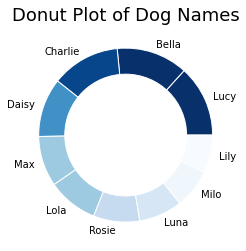

In [8]:
#For the fourth graph, I'll just do a simple tally of the 10 most popular dog names by using a donut plot.
my_values = dog_data.Dog_Name.value_counts()[:10]
cmap = matplotlib.cm.Blues
mini = min(my_values)
maxi = max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

plt.pie(my_values, labels=my_values.index, colors=colors, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })

#Adding white circle in the middle to turn pie in donut
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Donut Plot of Dog Names", size=18)